<a href="https://colab.research.google.com/github/sagarbhadra7/Python-Programs/blob/master/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [0]:
train_path="/content/train.csv"
test_path="/content/test.csv"
train=pd.read_csv(train_path)
test=pd.read_csv(test_path)
y=train['Loan_Status']
data=pd.concat([train,test],axis='rows')

In [84]:
train.shape

(614, 13)

In [85]:
test.shape

(367, 12)

In [86]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
data['Gender'].fillna('Male',inplace=True)
data['Married'].fillna('Yes',inplace=True)
data['Self_Employed'].fillna('No',inplace=True)
data['Dependents'].fillna('0',inplace=True)
data['LoanAmount'].fillna(data.LoanAmount.mean(),inplace=True)
data['Loan_Amount_Term'].fillna(360.0,inplace=True)
data['Credit_History'].fillna(1.0,inplace=True)

In [0]:
data['log_LoanAmount']=np.log(data['LoanAmount'])

In [0]:
data['log_ApplicantIncome']=np.log(data['ApplicantIncome']+10)

In [0]:
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']

In [0]:
data['log_TotalIncome']=np.log(data['TotalIncome'])

In [0]:
data['LoanAmountToTotalIncome']=data['LoanAmount']/data['TotalIncome']

In [0]:
data['LoanAmountToAppIncome']=data['ApplicantIncome']/data['LoanAmount']

In [0]:
data['LoanAmountToTotalIncome']=data['LoanAmountToTotalIncome'].astype(float)  
data['LoanAmountToAppIncome']=data['LoanAmountToAppIncome'].astype(float)
data['log_TotalIncome']=data['log_TotalIncome'].astype(float)
data['log_ApplicantIncome']=data['log_ApplicantIncome'].astype(float)
data['log_LoanAmount']=data['log_LoanAmount'].astype(float)

In [95]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,log_ApplicantIncome,TotalIncome,log_TotalIncome,LoanAmountToTotalIncome,LoanAmountToAppIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,4.959423,8.675734,5849.0,8.674026,0.024365,41.042293
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,4.852030,8.432289,6091.0,8.714568,0.021015,35.804688
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,4.189655,8.009695,3000.0,8.006368,0.022000,45.454545
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,4.787492,7.860571,4941.0,8.505323,0.024287,21.525000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,4.948760,8.701180,6000.0,8.699515,0.023500,42.553191


In [96]:
data['Self_Employed'].value_counts()

No     862
Yes    119
Name: Self_Employed, dtype: int64

In [0]:
le=LabelEncoder()
le.fit(data['Self_Employed'])
data['Self_Employed']=le.transform(data['Self_Employed'])

In [98]:
data['Self_Employed'].value_counts()

0    862
1    119
Name: Self_Employed, dtype: int64

In [99]:
data.isnull().sum()

Loan_ID                      0
Gender                       0
Married                      0
Dependents                   0
Education                    0
Self_Employed                0
ApplicantIncome              0
CoapplicantIncome            0
LoanAmount                   0
Loan_Amount_Term             0
Credit_History               0
Property_Area                0
Loan_Status                367
log_LoanAmount               0
log_ApplicantIncome          0
TotalIncome                  0
log_TotalIncome              0
LoanAmountToTotalIncome      0
LoanAmountToAppIncome        0
dtype: int64

In [22]:
data.dtypes

Loan_ID                     object
Gender                      object
Married                     object
Dependents                  object
Education                   object
Self_Employed               object
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Property_Area               object
Loan_Status                 object
log_LoanAmount             float64
log_ApplicantIncome        float64
TotalIncome                float64
log_TotalIncome            float64
LoanAmountToTotalIncome    float64
LoanAmountToAppIncome      float64
dtype: object

In [0]:
X_gender_train=pd.get_dummies(data['Gender'])
X_married_train=pd.get_dummies(data['Married'])
#X_Self_Employed_train=pd.get_dummies(data['Self_Employed'])
X_Property_Area_train=pd.get_dummies(data['Property_Area'])

In [27]:
X_gender_train.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [28]:
X_married_train.head()

,Married_No,Married_yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [29]:
X_Self_Employed_train.head()

,Self_Employed_No,Self_Employed_yes
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [30]:
X_Property_Area_train.head()

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [0]:
X_Self_Employed_train.rename(columns = {'No':'Self_Employed_No','Yes':'Self_Employed_yes'},inplace = True) 
X_married_train.rename(columns = {'No':'Married_No','Yes':'Married_yes'},inplace = True)
X_gender_train.rename(columns = {'Female':'Female','Male':'Gender'},inplace = True)

In [0]:
frames=[data,X_gender_train,X_married_train,X_Self_Employed_train,X_Property_Area_train]
df=pd.concat(frames,axis='columns')

In [0]:
df['Dependents']=df['Dependents'].replace('3+','3')

In [0]:
df.drop(['Loan_ID','Gender','Married','Self_Employed','Property_Area','Married_No','Self_Employed_No','Female','Urban'],axis=1,inplace=True)

In [0]:
le=LabelEncoder()
df['Education']=le.fit_transform(df.Education)
df['Dependents']=df['Dependents'].apply(pd.to_numeric) 


In [38]:
df.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,log_LoanAmount,log_ApplicantIncome,TotalIncome,log_TotalIncome,LoanAmountToTotalIncome,LoanAmountToAppIncome,Married_yes,Self_Employed_yes,Rural,Semiurban
0,0,0,5849,0.0,142.51153,360.0,1.0,Y,4.959423,8.675734,5849.0,8.674026,0.024365,41.042293,0,0,0,0
1,1,0,4583,1508.0,128.00000,360.0,1.0,N,4.852030,8.432289,6091.0,8.714568,0.021015,35.804688,1,0,1,0
2,0,0,3000,0.0,66.00000,360.0,1.0,Y,4.189655,8.009695,3000.0,8.006368,0.022000,45.454545,1,1,0,0
3,0,1,2583,2358.0,120.00000,360.0,1.0,Y,4.787492,7.860571,4941.0,8.505323,0.024287,21.525000,1,0,0,0
4,0,0,6000,0.0,141.00000,360.0,1.0,Y,4.948760,8.701180,6000.0,8.699515,0.023500,42.553191,0,0,0,0


In [0]:
df.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'],axis=1,inplace=True)

In [107]:
df.dtypes

Dependents                   int64
Education                    int64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
log_LoanAmount             float64
log_ApplicantIncome        float64
log_TotalIncome            float64
LoanAmountToTotalIncome    float64
LoanAmountToAppIncome      float64
Married_yes                  uint8
Self_Employed_yes            uint8
Rural                        uint8
Semiurban                    uint8
dtype: object

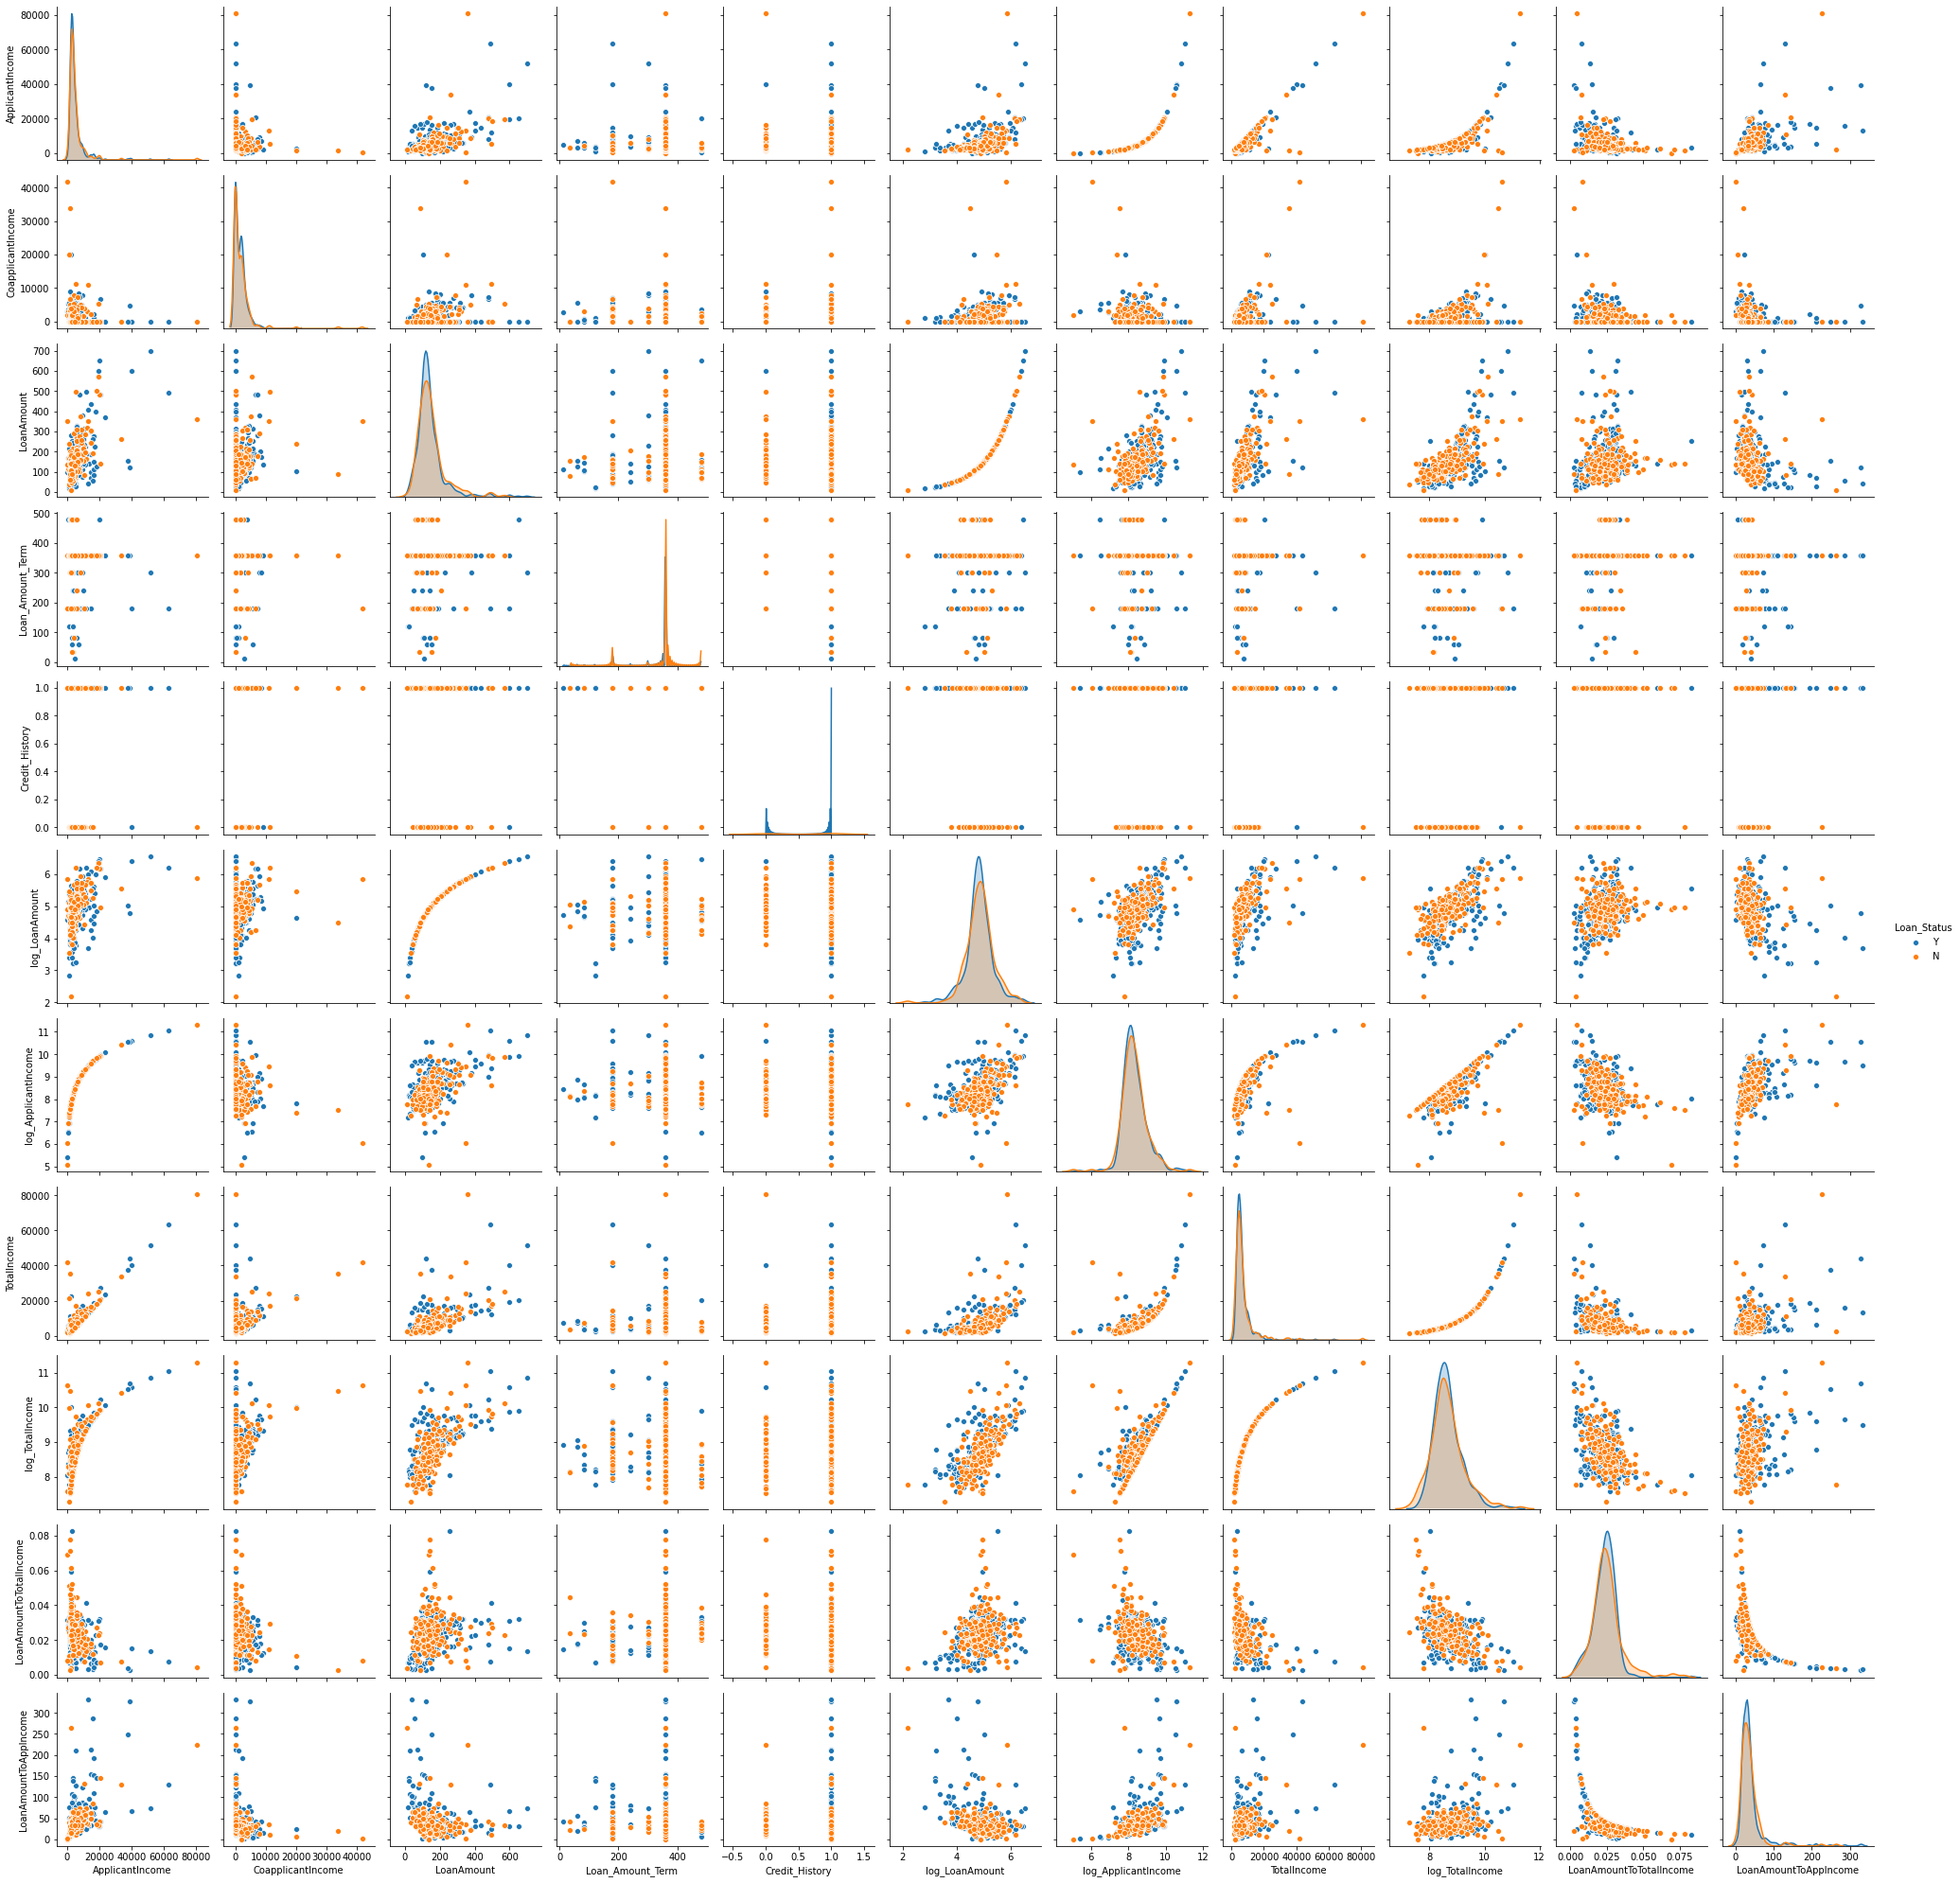

In [42]:
sns.pairplot(data,hue='Loan_Status')

In [108]:
df.isnull().sum()

Dependents                   0
Education                    0
Loan_Amount_Term             0
Credit_History               0
Loan_Status                367
log_LoanAmount               0
log_ApplicantIncome          0
log_TotalIncome              0
LoanAmountToTotalIncome      0
LoanAmountToAppIncome        0
Married_yes                  0
Self_Employed_yes            0
Rural                        0
Semiurban                    0
dtype: int64

In [0]:
df=df.drop(columns='Loan_Status',axis=1)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()
scaler_test = StandardScaler()
scaler_train.fit(X_train_imputed)
X_train_imputed = scaler_train.transform(X_train_imputed)
scaler_test.fit(X_test_imputed)
X_test_imputed = scaler_test.transform(X_test_imputed)

In [0]:
X=df.iloc[:614,:]
x_test=df.iloc[614:,:]

# Bagging
use normal data with standard scaler


In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1,oob_score=True)
bag_clf.fit(X, y)
y_pred = bag_clf.predict(x_test)

In [0]:
df_pred=pd.DataFrame(y_pred)
df_pred.to_csv("bagging.csv")

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1,bootstrap=True,oob_score=True)
rnd_clf.fit(X, y)
y_pred_rf = rnd_clf.predict(x_test)

In [0]:
df_pred=pd.DataFrame(y_pred)
df_pred.to_csv("randome_forest.csv")

# ExtraTreesClassifier

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1,bootstrap=True,oob_score=True)
ext_clf.fit(X, y)
y_pred_ef = ext_clf.predict(x_test)

In [0]:
df_pred=pd.DataFrame(y_pred)
df_pred.to_csv("ETC.csv")

# KNN algo

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X, y)
y_pred_knn=classifier.predict(x_test)

In [0]:
df_pred=pd.DataFrame(y_pred)
df_pred.to_csv("KNN.csv")